In [1]:
import pandas as pd 
df=pd.read_csv(r"A:\Doc\DSMP\Python\DataSets\income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


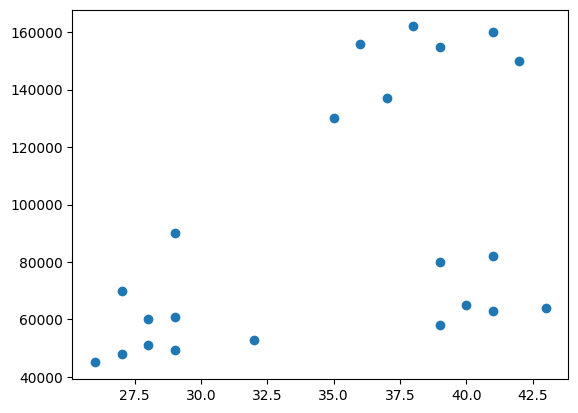

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df['Income($)'])

In [3]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [4]:
df1=df.drop(['Name'],axis=1)

In [5]:
df1['cluster']=km.fit_predict(df1)

C:\Software\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

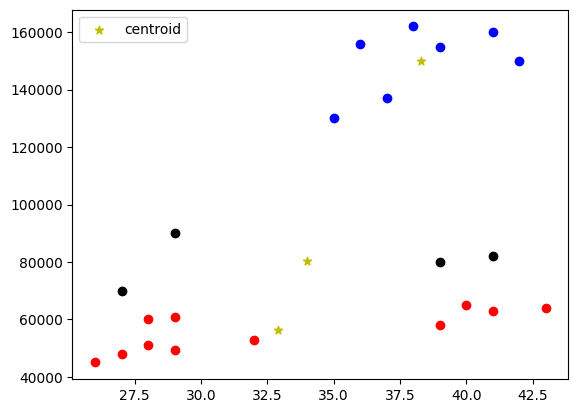

In [7]:
df2=df1[df1.cluster == 0]
df3=df1[df1.cluster == 1]
df4=df1[df1.cluster == 2]
plt.scatter(df2['Age'],df2['Income($)'],c='r')
plt.scatter(df3['Age'],df3['Income($)'],c='b')
plt.scatter(df4['Age'],df4['Income($)'],c='k')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='y',marker="*",label='centroid')
plt.legend()

In [8]:
from sklearn.preprocessing import MinMaxScaler


In [9]:
scalar=MinMaxScaler()
df1['Income($)']=scalar.fit_transform(df[['Income($)']])
df1['Age']=scalar.fit_transform(df[['Age']])
df1

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


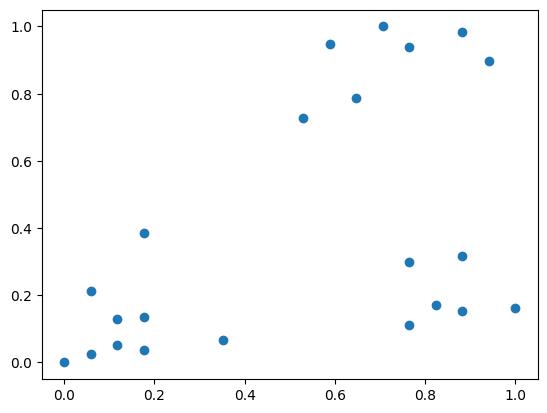

In [10]:
plt.scatter(df1['Age'],df1['Income($)'])

In [11]:
df1['predict']=km.fit_predict(df1.drop(['cluster'],axis=1))

C:\Software\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
df1=df1.drop(['cluster'],axis=1)

In [13]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

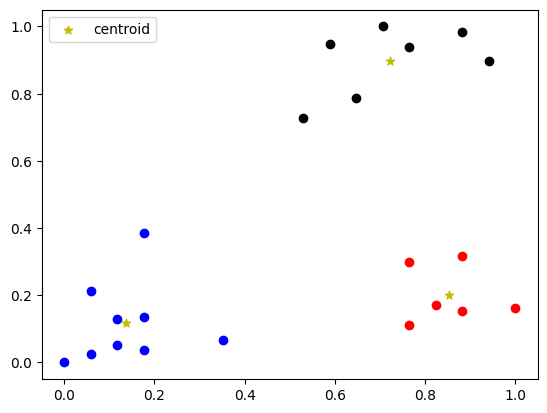

In [14]:
df2=df1[df1.predict == 0]
df3=df1[df1.predict == 1]
df4=df1[df1.predict == 2]
plt.scatter(df2['Age'],df2['Income($)'],c='r')
plt.scatter(df3['Age'],df3['Income($)'],c='b')
plt.scatter(df4['Age'],df4['Income($)'],c='k')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='y',marker="*",label='centroid')
plt.legend()

In [20]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df1[['Age']],df1[['Income($)']])
    sse.append(km.inertia_)

C:\Software\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Software\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Software\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Software\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

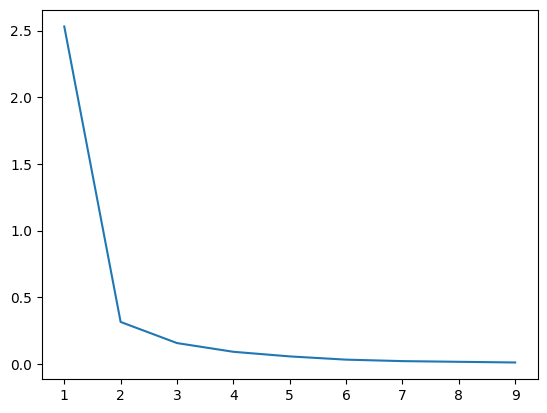

In [21]:
plt.plot(k_range,sse)